In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data
from google.colab import files
uploaded=files.upload()

Saving Oil_Historical_Data.csv to Oil_Historical_Data.csv


In [3]:
data=pd.read_csv("Oil_Historical_Data.csv")

In [4]:
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,08/21/2019,55.68,56.05,57.13,55.55,704.04K,-1.17%
1,08/20/2019,56.34,56.10,56.60,55.28,47.45K,0.23%
2,08/19/2019,56.21,54.96,56.41,54.84,113.57K,2.44%
3,08/16/2019,54.87,54.74,55.67,54.26,168.35K,0.73%
4,08/15/2019,54.47,54.90,55.33,53.77,527.87K,-1.38%


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      4930 non-null   object 
 6   Change %  5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [6]:
data['Date']=pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5000 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      5000 non-null   float64       
 3   High      5000 non-null   float64       
 4   Low       5000 non-null   float64       
 5   Vol.      4930 non-null   object        
 6   Change %  5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 273.6+ KB


In [8]:
data.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        70
Change %     0
dtype: int64

As we are condisdering supervised learning we need only X and Y values for the prediction i.e Price and Date so we will drop the other columns from the data frame

In [9]:
data.drop(['Open', 'High','Low','Vol.','Change %'], axis=1)

,Date,Price
0,2019-08-21,55.68
1,2019-08-20,56.34
2,2019-08-19,56.21
3,2019-08-16,54.87
4,2019-08-15,54.47
...,...,...
4995,2000-01-10,24.67
4996,2000-01-07,24.22
4997,2000-01-06,24.78
4998,2000-01-05,24.91


In [10]:
#check for duplicate values
data.duplicated().sum()

0

In [11]:
#convert date into list
date=data.Date.tolist()

In [12]:
#checking for consequtive dates
from datetime import datetime, timedelta
# using loop for iterating all elements
res = True
for idx in range(1, len(date)):

    # checking for 1 day time difference
    if (date[idx - 1] - date[idx]).days != 1:
        res = False
        break
# printing result
print("Are dates consecutive : " + str(res))

Are dates consecutive : False


In [13]:
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")  #changing the date format to YYYY-MM-DD

In [14]:
import datetime
len_of_date=len(data.Date)     #length of the date
start=data.Date[0]
end=data.Date[len_of_date-1]
new_dates = pd.date_range(start=end,end=start,freq='D')

In [15]:
start

Timestamp('2019-08-21 00:00:00')

In [16]:
end

Timestamp('2000-01-04 00:00:00')

In [17]:
new_dates     #new dates

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-08', '2000-01-09', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-17', '2019-08-18', '2019-08-19',
               '2019-08-20', '2019-08-21'],
              dtype='datetime64[ns]', length=7170, freq='D')

In [18]:
data = data.set_index('Date')    #we are setting Date acolumn as our index

In [19]:
data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-08-21,55.68,56.05,57.13,55.55,704.04K,-1.17%
2019-08-20,56.34,56.10,56.60,55.28,47.45K,0.23%
2019-08-19,56.21,54.96,56.41,54.84,113.57K,2.44%
2019-08-16,54.87,54.74,55.67,54.26,168.35K,0.73%
2019-08-15,54.47,54.90,55.33,53.77,527.87K,-1.38%


In [20]:
data = data.reindex(new_dates)     #we have index as Date but we will re-index it with our new dates which we generated.
data = data.rename_axis('date')      #we are renaming it as date.
print(data)

            Price   Open   High    Low     Vol. Change %
date                                                    
2000-01-04  25.55  25.20  25.69  24.71   74.79K   -0.20%
2000-01-05  24.91  25.50  25.61  24.87   70.94K   -2.50%
2000-01-06  24.78  24.80  25.34  24.51   85.25K   -0.52%
2000-01-07  24.22  24.65  25.00  24.15   91.83K   -2.26%
2000-01-08    NaN    NaN    NaN    NaN      NaN      NaN
...           ...    ...    ...    ...      ...      ...
2019-08-17    NaN    NaN    NaN    NaN      NaN      NaN
2019-08-18    NaN    NaN    NaN    NaN      NaN      NaN
2019-08-19  56.21  54.96  56.41  54.84  113.57K    2.44%
2019-08-20  56.34  56.10  56.60  55.28   47.45K    0.23%
2019-08-21  55.68  56.05  57.13  55.55  704.04K   -1.17%

[7170 rows x 6 columns]


In [21]:
data.isnull().sum()     #Now if we check, 2160 null values are present.

Price       2170
Open        2170
High        2170
Low         2170
Vol.        2240
Change %    2170
dtype: int64

Using LOCF(Last observation Carry forward) method to impute the missing values

In [22]:
data['Price']=data['Price'].fillna(method ='bfill')

In [23]:
data.isnull().sum()        #Now if we check the null values again, it is zero.

Price          0
Open        2170
High        2170
Low         2170
Vol.        2240
Change %    2170
dtype: int64

In [24]:
data.describe()

,Price,Open,High,Low
count,7170.000000,5000.000000,5000.000000,5000.000000
mean,61.937464,62.009766,62.908414,61.048820
std,26.455995,26.340652,26.590383,26.042623
min,17.450000,17.300000,18.250000,16.700000
25%,39.812500,40.672500,41.665000,39.827500
50%,59.000000,59.100000,59.900000,58.140000
75%,83.230000,82.985000,84.412500,81.722500
max,145.290000,145.190000,147.270000,143.220000


In [25]:
data.shape

(7170, 6)

Data Visualization

In [26]:
df=data.drop(['Open', 'High','Low','Vol.','Change %'], axis=1)
df

,Price
date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-08,24.67
...,...
2019-08-17,56.21
2019-08-18,56.21
2019-08-19,56.21


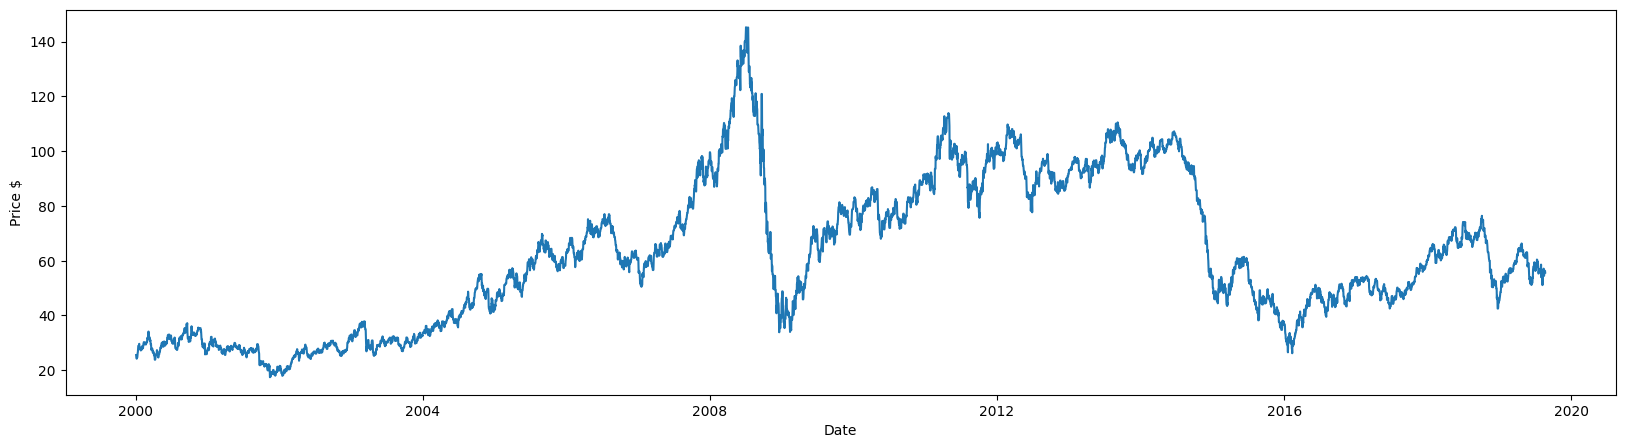

In [27]:
#LINE PLOT
plt.figure(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Price $")
plt.plot(df.Price)

Outliner Detection


Text(0.5, 0, 'PRICE $')

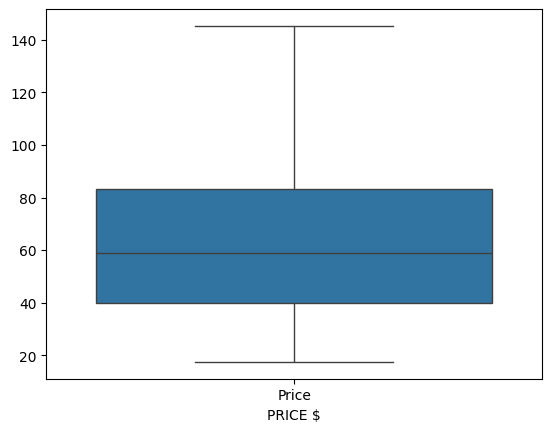

In [28]:
sns.boxplot(df)
plt.xlabel('PRICE $')

In [29]:
#Extracting Year and Month from the index

data['Year'] = pd.DatetimeIndex(data.index).year
data['Month'] = pd.DatetimeIndex(data.index).month

In [30]:
df.head()

,Price
date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-08,24.67


Text(0, 0.5, 'PRICE $')

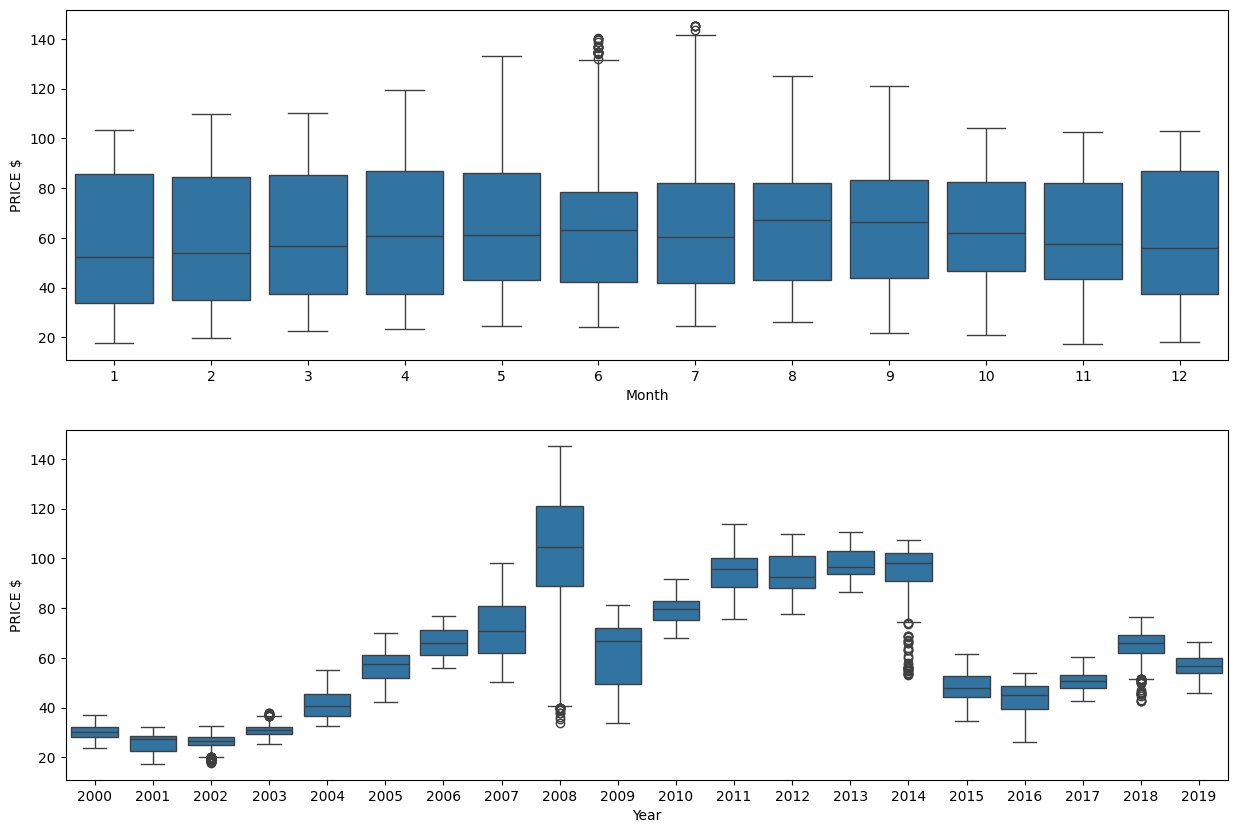

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x="Month",y="Price",data=data)
plt.ylabel('PRICE $')

plt.subplot(212)
year_outlier=sns.boxplot(x="Year",y="Price",data=data)
plt.ylabel('PRICE $')

Observations



whiskers [<matplotlib.lines.Line2D object at 0x78b60bf94e80>, <matplotlib.lines.Line2D object at 0x78b60bf95120>]
caps [<matplotlib.lines.Line2D object at 0x78b60bf953c0>, <matplotlib.lines.Line2D object at 0x78b60bf95660>]
boxes [<matplotlib.lines.Line2D object at 0x78b60bf94be0>]
medians [<matplotlib.lines.Line2D object at 0x78b60bf95900>]
fliers [<matplotlib.lines.Line2D object at 0x78b60bf95ba0>]
means []


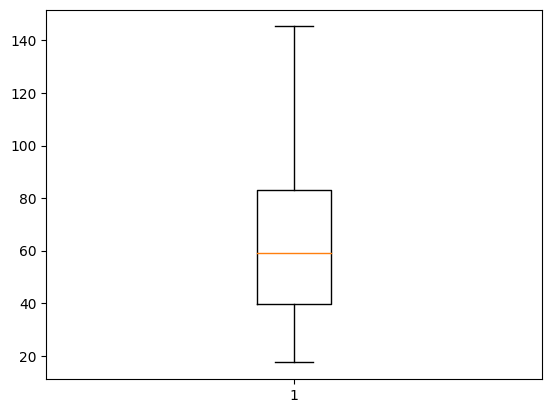

In [32]:
box=plt.boxplot(data['Price'])
type(box)
for i,j in box.items():
  print(i,j)

In [33]:
[item.get_ydata() for item in box['fliers']]

[array([], dtype=float64)]

Using Flooring and capping methods for treating outliers

In [34]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Price']=np.where(data['Price']>upper_whisker,upper_whisker,np.where(data['Price']<lower_whisker,lower_whisker,data['Price']))

Treating as outliners being absent

In [35]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Price']=np.where(data['Price']>upper_whisker,upper_whisker,np.where(data['Price']<lower_whisker,lower_whisker,data['Price']))

Treating as outliners being present

Heat Map Generation

<Axes: title={'center': 'Price $ Heatmap'}, xlabel='Month', ylabel='Year'>

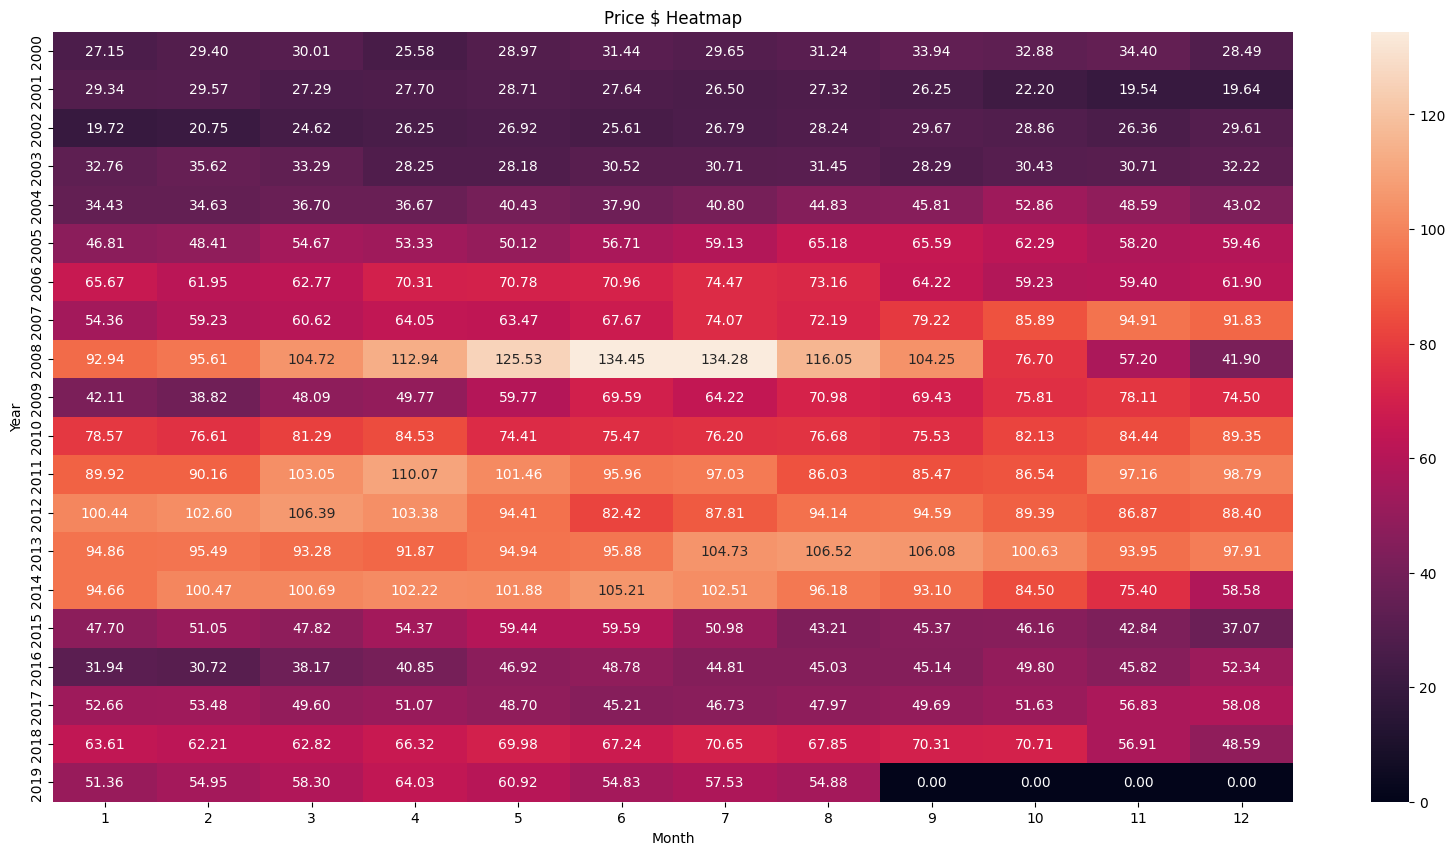

In [36]:
#HeatMap
plt.figure(figsize=(20,10))
table=pd.pivot_table(data=data, values='Price',index='Year', columns='Month',fill_value=0)
plt.title('Price $ Heatmap')
sns.heatmap(table, annot=True,fmt=".2f")

Observations:

* The light color represents high price
* Dark coolor represents low price
* In our data we have only Jan data in 2020 hence remaining all is showing as 0
* Similarly in year 2000 we have data from June hence those values are also 0
* June, 2008 has high avg Oil price.
* December, 2001 has low avg Oil price.
* From 2000 to 2004 the Oil price is very low and from 2005 to 2014 the Oil price has increased. From 2014 to 2020 Oil price has reduced little




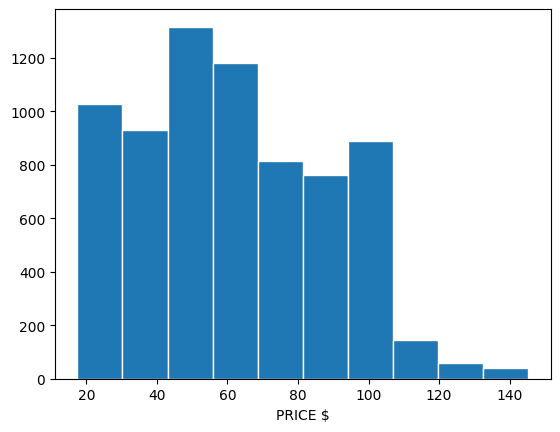

In [37]:
#Histogram
#todo double the bins=20
plt.hist(data['Price'],edgecolor='w')
plt.xlabel('PRICE $')
plt.show()

<Axes: ylabel='Density'>

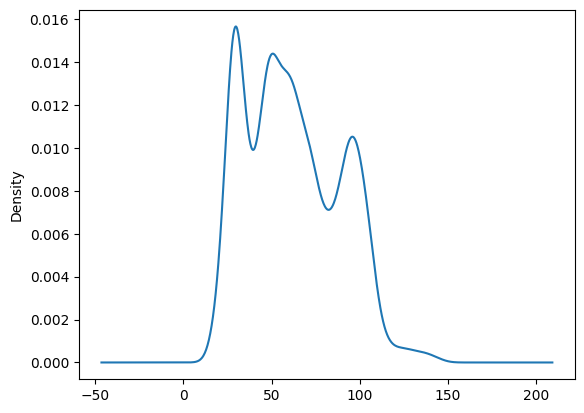

In [38]:
data.Price.plot(kind="kde")

There are 3 peaks in this density plot and it is reight skewed

As our data is not normally distributed , lets apply some transformation techniques **Squareroot Transformation**

<ipython-input-39-bbedac4b7bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Sqrt)


<Axes: xlabel='Sqrt', ylabel='Density'>

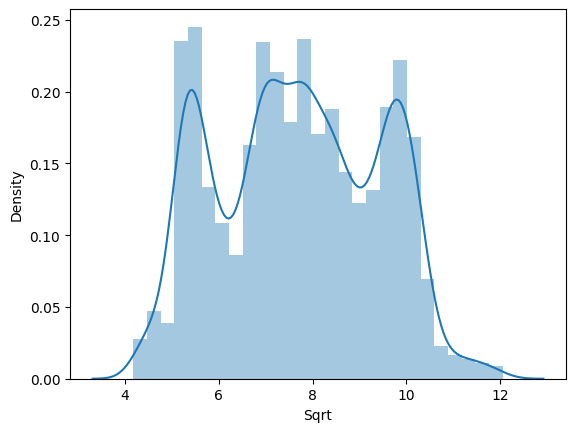

In [39]:
data['Sqrt']=np.sqrt(data['Price'])
sns.distplot(data.Sqrt)

Observations:

* We have transformed our data, we can observe the range of the price is in between 4 to 12
* It is trimodal histogram. This means that there are three values that occur most frequently in the data set, and the histogram has three distinct peaks.

LAGPLOT


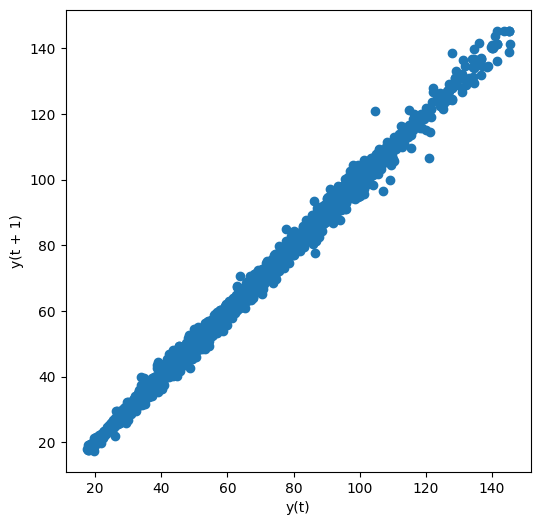

In [40]:
#LAG PLOT
from pandas.plotting import lag_plot
plt.figure(figsize=(6,6))
lag_plot(data['Price'])
plt.show()

Obsrvation:

* As y(t) increases y(t+1) is also increasing
* Lag=1
* Postivie correltion

**AUTO-CORRELATION PLOT**

* Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

In [41]:
#Auto-correlation plot
from statsmodels.graphics.tsaplots import plot_acf

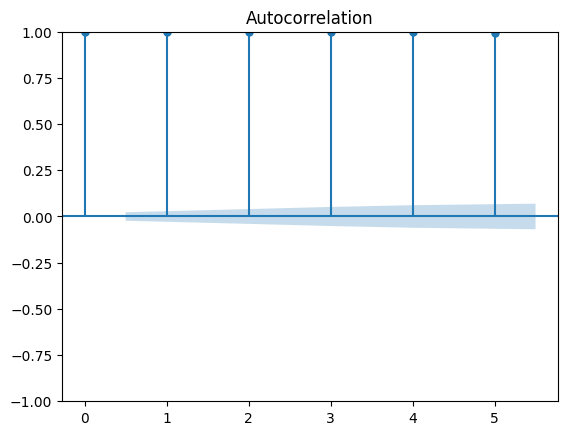

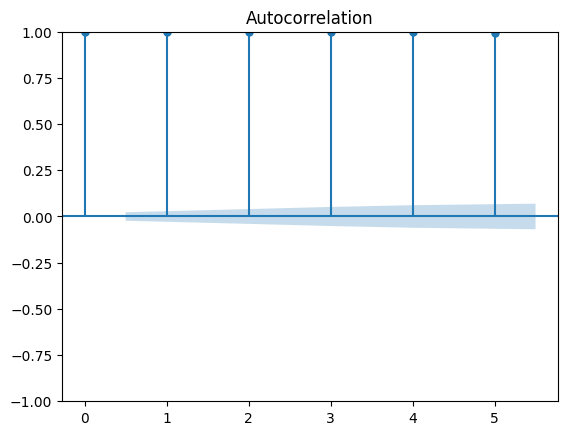

In [42]:
plot_acf(data['Price'], lags=5)

* Auto-correlation plot for 5 lags
* We can find the seasonality and trend here, there is no seasonality nor trend
* From the plot we can observe it has stronge postive correlation.

In [43]:
data['log_Price']=np.log(data['Price'])

In [44]:
t = np.arange(1,7171)
t

array([   1,    2,    3, ..., 7168, 7169, 7170])

In [45]:
data['t']=t

In [46]:
t_squared=np.array(t*t)
t_squared

array([       1,        4,        9, ..., 51380224, 51394561, 51408900])

In [47]:
data['t_squared']=t_squared

In [48]:
data.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared
date,,,,,,,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,5.054701,3.240637,1,1
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,4.990992,3.215269,2,4
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,4.977951,3.210037,3,9
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,4.921382,3.187179,4,16
2000-01-08,24.67,NaN,NaN,NaN,NaN,NaN,2000,1,4.966890,3.205588,5,25


Now lets go ahead with the TRAIN TEST SPLIT for our models

In [49]:
Train=data.head(5000)
Test=data.tail(2170)

In [50]:
Test.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared
date,,,,,,,,,,,,
2013-09-12,108.60,107.77,109.16,107.30,249.78K,0.97%,2013,9,10.421132,4.687671,5001,25010001
2013-09-13,108.21,108.64,108.74,107.23,207.04K,-0.36%,2013,9,10.402404,4.684074,5002,25020004
2013-09-14,106.59,NaN,NaN,NaN,NaN,NaN,2013,9,10.324243,4.668990,5003,25030009
2013-09-15,106.59,NaN,NaN,NaN,NaN,NaN,2013,9,10.324243,4.668990,5004,25040016
2013-09-16,106.59,107.50,108.00,106.06,282.89K,-1.50%,2013,9,10.324243,4.668990,5005,25050025


In [51]:
Train.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared
date,,,,,,,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,5.054701,3.240637,1,1
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,4.990992,3.215269,2,4
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,4.977951,3.210037,3,9
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,4.921382,3.187179,4,16
2000-01-08,24.67,NaN,NaN,NaN,NaN,NaN,2000,1,4.966890,3.205588,5,25


Model Building

In [52]:
import statsmodels.formula.api as smf

**LINEAR MODEL**

In [53]:
#LINEAR MODEL
Linear_model=smf.ols('Price~t', data=Train).fit( )    #y~x
pred_linear=pd.Series(Linear_model.predict(Test['t']))   #predicting for test
rmse_linear = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear))**2))    #sqrt of mean(y act - y pred)^2
rmse_linear

67.35145943041151

EXPONENTIAL MODEL

In [54]:
#SAME LIKE LINEAR BUT IN PLACE OF Yt WE USE LOG(Yt)
Exp=smf.ols('log_Price~t', data=Train).fit( )                                   #log(y)~x
pred_Exp=pd.Series(Exp.predict(Test['t']))   #predicting for test
rmse_Exp = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_Exp)))**2))    #sqrt of mean(y act - y pred)^2
rmse_Exp

119.9804413450112

QUADRARIC MODEL

In [55]:
Quad=smf.ols('Price~t+t_squared', data=Train).fit( )
pred_Quad=pd.Series(Quad.predict(Test[['t', 't_squared']]))    #predicting for test
rmse_Quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_Quad))**2))    #sqrt of mean(y act - y pred)^2
rmse_Quad

56.81994174089382

A. Exponential Smoothning

Simple Exponential Smoothing
Double Exponential Smoothing
Triple Exponential Smoothing

Simple Exponential Smoothing

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha = 0.15

In [57]:
model_ses12=SimpleExpSmoothing(data['Price'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

date
2000-01-04    25.550000
2000-01-05    25.550000
2000-01-06    25.454000
2000-01-07    25.352900
2000-01-08    25.182965
                ...    
2019-08-17    54.954997
2019-08-18    55.143247
2019-08-19    55.303260
2019-08-20    55.439271
2019-08-21    55.574381
Freq: D, Length: 7170, dtype: float64

In [58]:
data['SES12'] = fitted_model.fittedvalues.shift(-1)
data.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared,SES12
date,,,,,,,,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,5.054701,3.240637,1,1,25.550000
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,4.990992,3.215269,2,4,25.454000
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,4.977951,3.210037,3,9,25.352900
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,4.921382,3.187179,4,16,25.182965
2000-01-08,24.67,NaN,NaN,NaN,NaN,NaN,2000,1,4.966890,3.205588,5,25,25.106020


Double Exponential Model

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
mod_add12 = ExponentialSmoothing(data['Price'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12
date,,,,,,,,,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,5.054701,3.240637,1,1,25.550000,25.554450
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,4.990992,3.215269,2,4,25.454000,24.923046
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,4.977951,3.210037,3,9,25.352900,24.786191
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,4.921382,3.187179,4,16,25.182965,24.231976
2000-01-08,24.67,NaN,NaN,NaN,NaN,NaN,2000,1,4.966890,3.205588,5,25,25.106020,24.668247


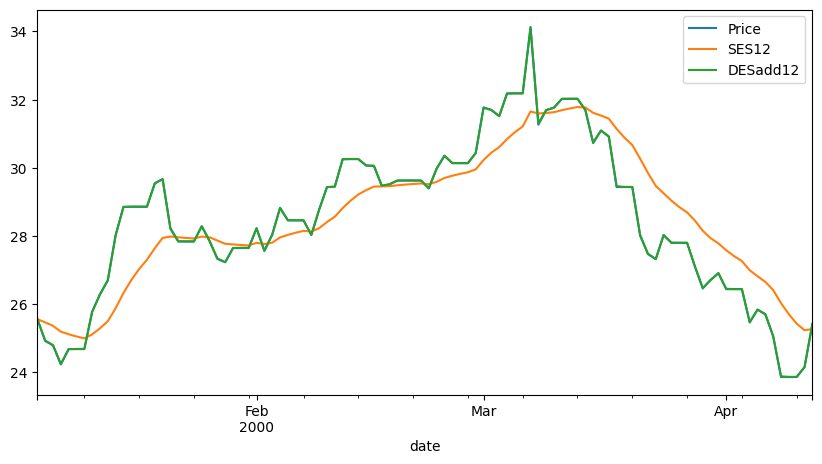

In [60]:
data[['Price','SES12','DESadd12']].iloc[:100].plot(figsize=(10,5));

In [61]:
data['DESmul12'] = ExponentialSmoothing(data['Price'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12
date,,,,,,,,,,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,5.054701,3.240637,1,1,25.550000,25.554450,25.547112
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,4.990992,3.215269,2,4,25.454000,24.923046,24.915952
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,4.977951,3.210037,3,9,25.352900,24.786191,24.779160
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,4.921382,3.187179,4,16,25.182965,24.231976,24.224968
2000-01-08,24.67,NaN,NaN,NaN,NaN,NaN,2000,1,4.966890,3.205588,5,25,25.106020,24.668247,24.661283


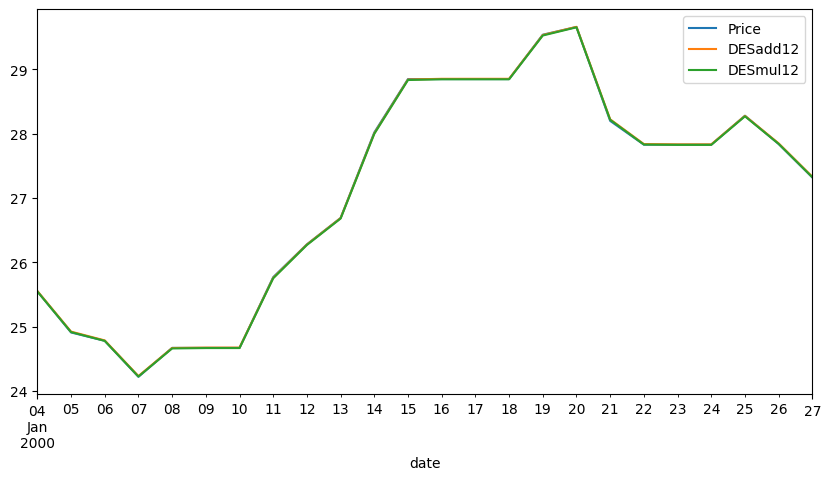

In [62]:
data[['Price','DESadd12','DESmul12']].iloc[:24].plot(figsize=(10,5));

Triple Exponential Smoothing

In [63]:
data['TESadd12'] = ExponentialSmoothing(data['Price'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12,TESadd12
date,,,,,,,,,,,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,5.054701,3.240637,1,1,25.550000,25.554450,25.547112,25.538583
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,4.990992,3.215269,2,4,25.454000,24.923046,24.915952,25.570954
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,4.977951,3.210037,3,9,25.352900,24.786191,24.779160,24.946364
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,4.921382,3.187179,4,16,25.182965,24.231976,24.224968,24.799176
2000-01-08,24.67,NaN,NaN,NaN,NaN,NaN,2000,1,4.966890,3.205588,5,25,25.106020,24.668247,24.661283,24.312773


In [64]:
data['TESmul12'] = ExponentialSmoothing(data['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Price,Open,High,Low,Vol.,Change %,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12,TESadd12,TESmul12
date,,,,,,,,,,,,,,,,,
2000-01-04,25.55,25.20,25.69,24.71,74.79K,-0.20%,2000,1,5.054701,3.240637,1,1,25.550000,25.554450,25.547112,25.538583,25.544236
2000-01-05,24.91,25.50,25.61,24.87,70.94K,-2.50%,2000,1,4.990992,3.215269,2,4,25.454000,24.923046,24.915952,25.570954,25.561011
2000-01-06,24.78,24.80,25.34,24.51,85.25K,-0.52%,2000,1,4.977951,3.210037,3,9,25.352900,24.786191,24.779160,24.946364,24.933640
2000-01-07,24.22,24.65,25.00,24.15,91.83K,-2.26%,2000,1,4.921382,3.187179,4,16,25.182965,24.231976,24.224968,24.799176,24.785080
2000-01-08,24.67,NaN,NaN,NaN,NaN,NaN,2000,1,4.966890,3.205588,5,25,25.106020,24.668247,24.661283,24.312773,24.254850


<Axes: xlabel='date'>

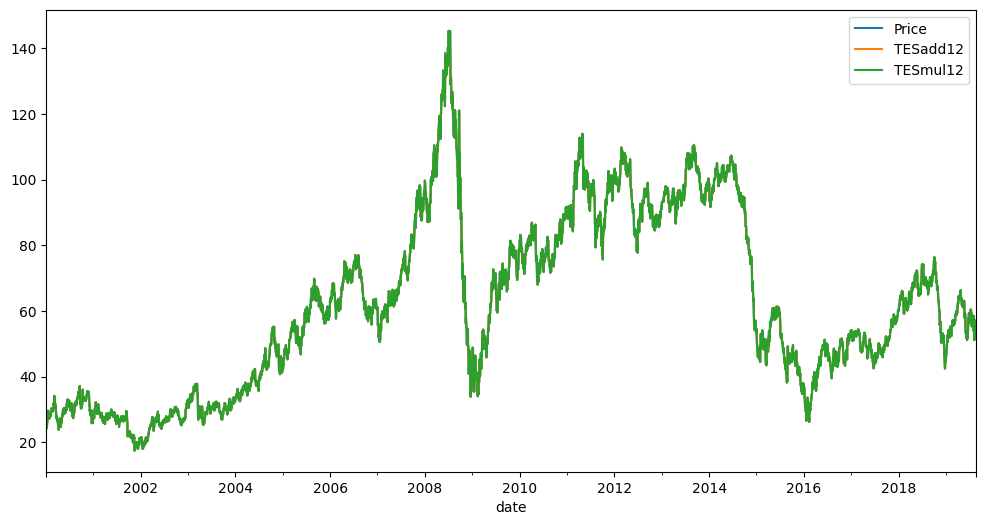

In [65]:
data[['Price','TESadd12','TESmul12']].plot(figsize=(12,6))

<Axes: xlabel='date'>

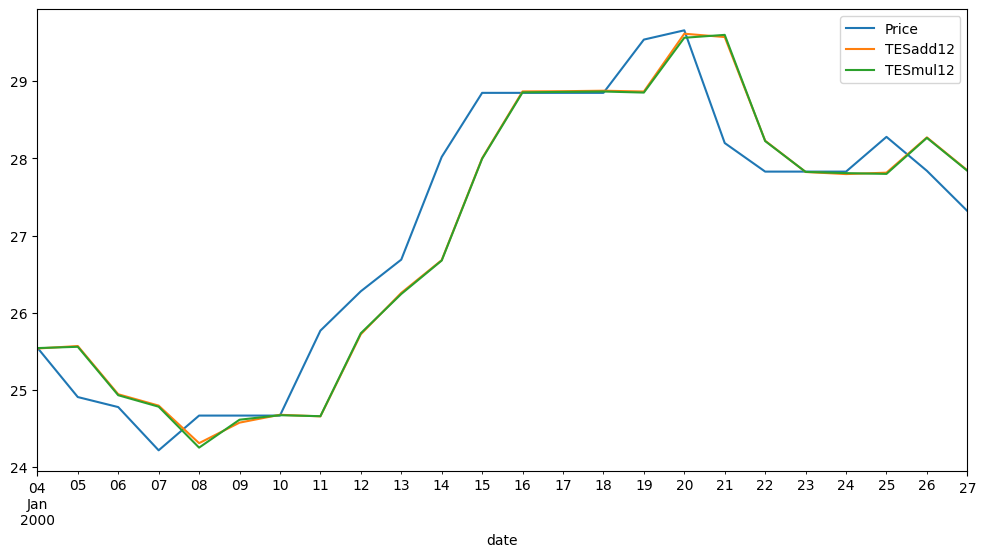

In [66]:
data[['Price','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6))

**LSTM Model**

In [67]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [68]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price']])

In [69]:
sequence_length = 10

In [70]:
sequences = []
target = []
for i in range(sequence_length, len(scaled_data)):
    sequences.append(scaled_data[i - sequence_length:i, 0])
    target.append(scaled_data[i, 0])

X = np.array(sequences)
y = np.array(target)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [71]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
179/179 [==============================] - 2s 5ms/step - loss: 0.0122
Epoch 2/50
179/179 [==============================] - 1s 5ms/step - loss: 2.5359e-04
Epoch 3/50
179/179 [==============================] - 1s 5ms/step - loss: 2.4200e-04
Epoch 4/50
179/179 [==============================] - 1s 5ms/step - loss: 2.3099e-04
Epoch 5/50
179/179 [==============================] - 1s 5ms/step - loss: 2.2773e-04
Epoch 6/50
179/179 [==============================] - 1s 6ms/step - loss: 2.1376e-04
Epoch 7/50
179/179 [==============================] - 1s 8ms/step - loss: 2.0533e-04
Epoch 8/50
179/179 [==============================] - 1s 7ms/step - loss: 2.0876e-04
Epoch 9/50
179/179 [==============================] - 1s 5ms/step - loss: 1.9092e-04
Epoch 10/50
179/179 [==============================] - 1s 5ms/step - loss: 1.9442e-04
Epoch 11/50
179/179 [==============================] - 1s 5ms/step - loss: 1.8149e-04
Epoch 12/50
179/179 [==============================] - 1s 5ms/step 

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
# Evaluate the LSTM model
lstm_mae = mean_absolute_error(Test['Price'][-len(lstm_predictions):], lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(Test['Price'][-len(lstm_predictions):], lstm_predictions))
print("LSTM MAE:", lstm_mae)
print("LSTM RMSE:", lstm_rmse)

45/45 [==============================] - 0s 3ms/step
LSTM MAE: 0.6383383436575949
LSTM RMSE: 0.9261289189831029


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate R-squared (R2) score
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)
# Flatten the arrays for MAPE and R2 calculations
y_true_flat = test_data['Price'][-len(lstm_predictions):].values.flatten()
lstm_predictions_flat = lstm_predictions.flatten()

# Calculate MAPE and R2
mape = calculate_mape(y_true_flat, lstm_predictions_flat)
r2 = calculate_r2(y_true_flat, lstm_predictions_flat)

print("LSTM MAPE:", mape)
print("LSTM Accuracy:", r2)

import joblib
#joblib.dump(model, 'trained_lstm_model.pkl')
pkl_model_path = 'trained_lstm_model.pkl'
joblib.dump(model, pkl_model_path)
print(f"Model saved to {pkl_model_path} in .pkl format.")

# Save the model as a .h5 file
h5_model_path = 'trained_lstm_model.h5'
model.save(h5_model_path)
print(f"Model saved to {h5_model_path} in .h5 format.")

LSTM MAPE: 1.2843247811637613
LSTM Accuracy: 0.991650980514143
Model saved to trained_lstm_model.pkl in .pkl format.
Model saved to trained_lstm_model.h5 in .h5 format.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Trend Projection**

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
data['Day'] = (data.index - data.index[0]).days  # Add a day count column

# Split data into train and test sets
trend_train = data.iloc[:train_size]
trend_test = data.iloc[train_size:]

In [76]:
# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(trend_train[['Day']], trend_train['Price'])

LinearRegression()

In [77]:
trend_test['TrendProjection'] = regressor.predict(trend_test[['Day']])

trend_mae = mean_absolute_error(trend_test['Price'], trend_test['TrendProjection'])
trend_rmse = np.sqrt(mean_squared_error(trend_test['Price'], trend_test['TrendProjection']))
print("Trend Projection MAE:", trend_mae)
print("Trend Projection RMSE:", trend_rmse)

Trend Projection MAE: 58.5059291834097
Trend Projection RMSE: 58.94949740887007


<ipython-input-77-68d2fe6f83e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_test['TrendProjection'] = regressor.predict(trend_test[['Day']])


**GRU Model**

In [78]:
from tensorflow.keras.layers import GRU

In [79]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price']])

sequence_length = 10
sequences = []
target = []
for i in range(sequence_length, len(scaled_data)):
    sequences.append(scaled_data[i - sequence_length:i, 0])
    target.append(scaled_data[i, 0])

X = np.array(sequences)
y = np.array(target)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [80]:
model_gru = Sequential()
model_gru.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
179/179 [==============================] - 2s 5ms/step - loss: 0.0104
Epoch 2/50
179/179 [==============================] - 1s 5ms/step - loss: 1.8165e-04
Epoch 3/50
179/179 [==============================] - 1s 5ms/step - loss: 1.7404e-04
Epoch 4/50
179/179 [==============================] - 1s 5ms/step - loss: 1.6532e-04
Epoch 5/50
179/179 [==============================] - 1s 5ms/step - loss: 1.5995e-04
Epoch 6/50
179/179 [==============================] - 1s 5ms/step - loss: 1.5382e-04
Epoch 7/50
179/179 [==============================] - 1s 8ms/step - loss: 1.4419e-04
Epoch 8/50
179/179 [==============================] - 1s 7ms/step - loss: 1.3954e-04
Epoch 9/50
179/179 [==============================] - 1s 5ms/step - loss: 1.3224e-04
Epoch 10/50
179/179 [==============================] - 1s 5ms/step - loss: 1.3054e-04
Epoch 11/50
179/179 [==============================] - 1s 5ms/step - loss: 1.2038e-04
Epoch 12/50
179/179 [==============================] - 1s 5ms/step 

In [81]:
#predictions
gru_predictions = model_gru.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

gru_mae = mean_absolute_error(Test['Price'][-len(gru_predictions):], gru_predictions)
gru_rmse = np.sqrt(mean_squared_error(Test['Price'][-len(gru_predictions):], gru_predictions))

print("GRU MAE:", gru_mae)
print("GRU RMSE:", gru_rmse)

45/45 [==============================] - 0s 3ms/step
GRU MAE: 0.7720539137771009
GRU RMSE: 0.9904969200997242


In [82]:
import joblib
#joblib.dump(model, 'trained_gru_model.pkl')
pkl_model_path = 'trained_gru_model.pkl'
joblib.dump(model, pkl_model_path)
print(f"Model saved to {pkl_model_path} in .pkl format.")

# Save the model as a .h5 file
h5_model_path = 'trained_gru_model.h5'
model.save(h5_model_path)
print(f"Model saved to {h5_model_path} in .h5 format.")

Model saved to trained_gru_model.pkl in .pkl format.
Model saved to trained_gru_model.h5 in .h5 format.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the LSTM model from HDF5
model = load_model('trained_lstm_model.h5')
model1 =  load_model('trained_gru_model.h5')
# Example input sequence
input_sequence = np.random.rand(10, 1)  # Adjust the input data as needed

# Make predictions using the loaded model
predictions = model.predict(input_sequence)
prediction_gru = model1.predict(input_sequence)

print("Predictions:", predictions)
print("Prediction GRU :",prediction_gru)

1/1 [==============================] - 0s 251ms/step
Predictions: [[0.10523093]
 [0.25812402]
 [0.20523474]
 [0.22090802]
 [0.23606649]
 [0.2734081 ]
 [0.22368297]
 [0.29709557]
 [0.11611024]
 [0.2768022 ]]
Prediction GRU : [[0.10523093]
 [0.25812402]
 [0.20523474]
 [0.22090802]
 [0.23606649]
 [0.2734081 ]
 [0.22368297]
 [0.29709557]
 [0.11611024]
 [0.2768022 ]]


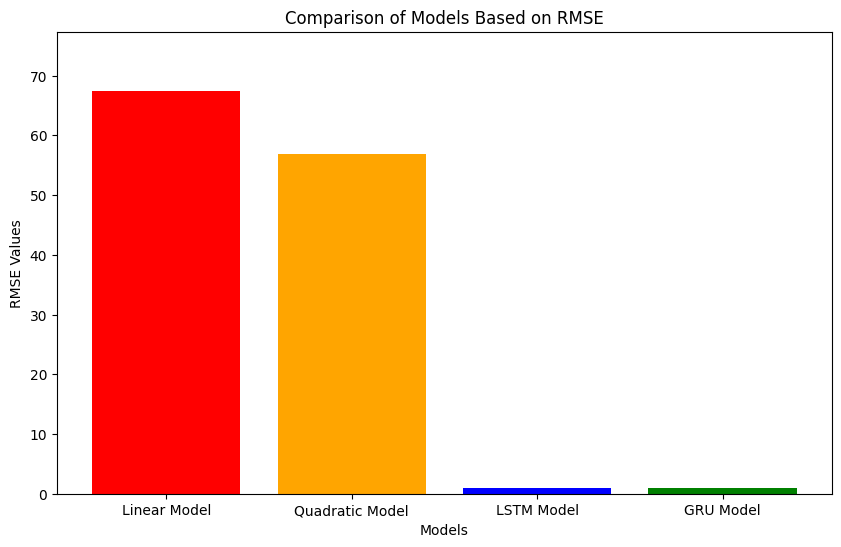

In [84]:
import matplotlib.pyplot as plt
# RMSE values for each model
rmse_values = [rmse_linear,rmse_Quad , lstm_rmse, gru_rmse]
model_names = ['Linear Model', 'Quadratic Model', 'LSTM Model', 'GRU Model']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['red', 'orange', 'blue', 'green'])
plt.title('Comparison of Models Based on RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.ylim(0, max(rmse_values) + 10)  # Adjust the y-axis limit if needed
plt.show()
